# Data augmentation parameters

In [1]:
import os
import pandas as pd
import numpy as np
import random
from collections import Counter
import matplotlib.pyplot as plt
%matplotlib inline


from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.utils import to_categorical



In [4]:
from data_loading_and_pretreatments.data_importation_and_formatting_v2 import load_masked_img_multiple_cond, set_img_size

In [3]:
data_folder = "../data"
conditions = ["Viral Pneumonia", "Lung_Opacity", "COVID",  "Normal"]
img_folder = "images"

lst_dirs_condition = [os.path.join(data_folder, cond, "images") for cond in conditions]

list_dir_images = pd.DataFrame({"img_type" : ["Viral Pneumonia", "Lung Opacity", "Covid", "Normal"],
                                 "img_dir" : lst_dirs_condition})


In [5]:
## Importation des images
IMG_SIZE = 256
set_img_size(IMG_SIZE)

SAMPLE_SIZE = 300
sample_size_viral_pneum = int(np.min([1345, SAMPLE_SIZE/2]))
sample_size_lung_opa = SAMPLE_SIZE - sample_size_viral_pneum
masked_img, labels = load_masked_img_multiple_cond(selected_conditions=conditions, sample_sizes=[sample_size_viral_pneum, sample_size_lung_opa, SAMPLE_SIZE, SAMPLE_SIZE])

In [6]:
X = np.repeat(masked_img,3,-1)

# Illustration sur une image

In [7]:
def plot(data_generator):
    """
    Plots 4 images generated by an object of the ImageDataGenerator class.
    """
  
    data_generator.flow(images)
    image_iterator = data_generator.flow(images)
    
    # Plot the images given by the iterator
    fig, rows = plt.subplots(nrows=1, ncols=4, figsize=(18,18))
    for row in rows:
        row.imshow(image_iterator.next()[0].astype('int'))
        row.axis('off')
    plt.show()

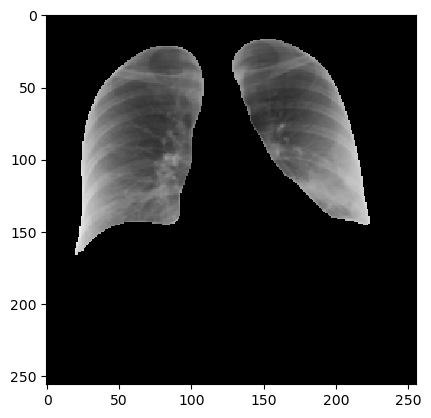

In [8]:
# Creating a dataset which contains just one image.
rand_ind = random.sample(range(0,X.shape[0]),1)
image = X[rand_ind][0]
images = np.array([image,image,image,image])
plt.imshow(images[0], 'gray')
plt.show()



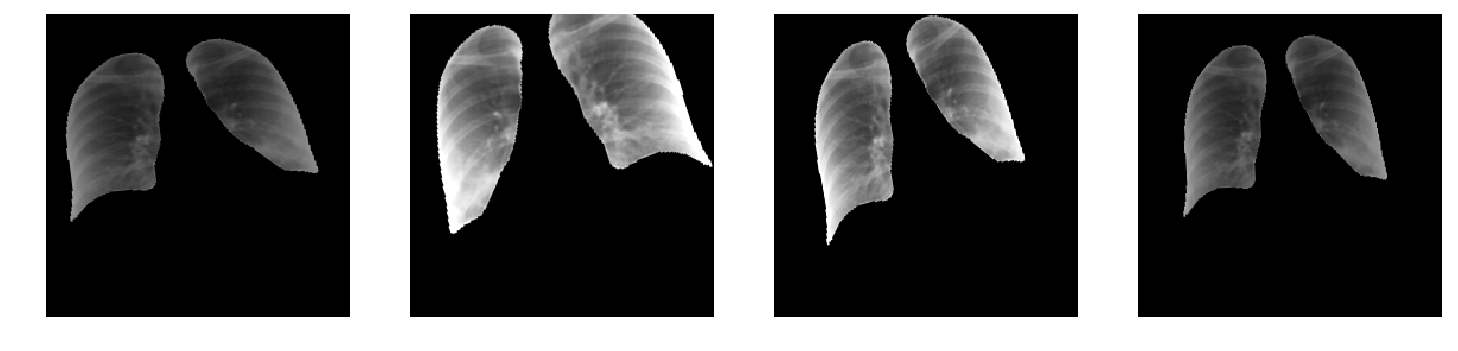

In [10]:
train_datagen = ImageDataGenerator(
    # width_shift_range = 0.1,
    # height_shift_range = 0.1,
    zoom_range = 0.2,
    rotation_range = 20,
    brightness_range = [0.6,1.4],
    horizontal_flip = True) 
plot(train_datagen)

# Sur un ensemble d'images

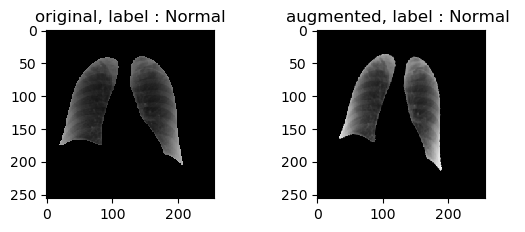

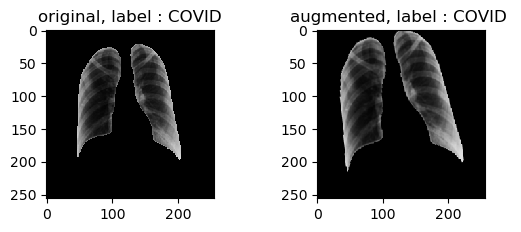

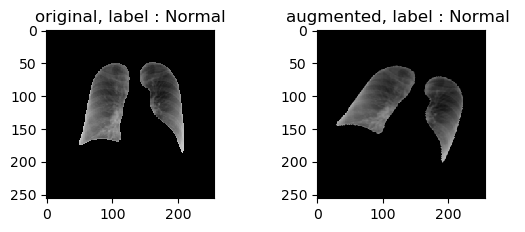

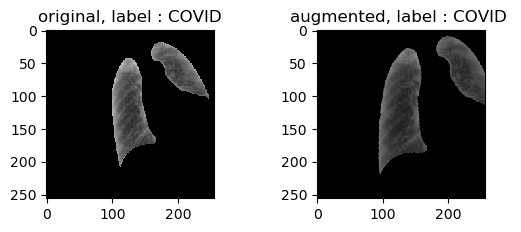

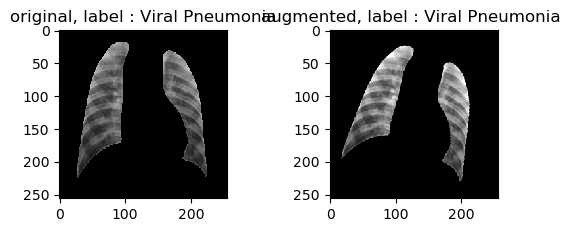

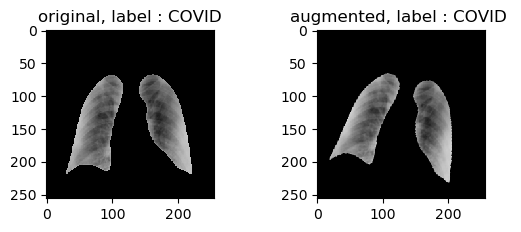

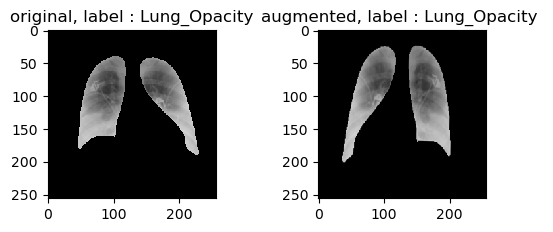

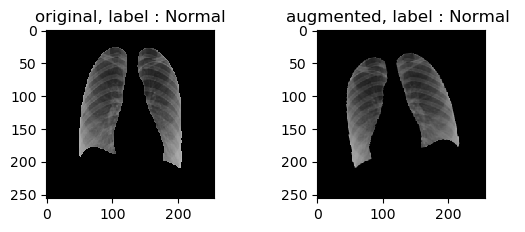

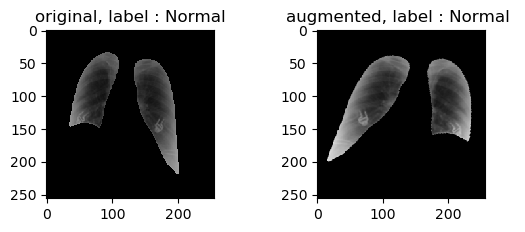

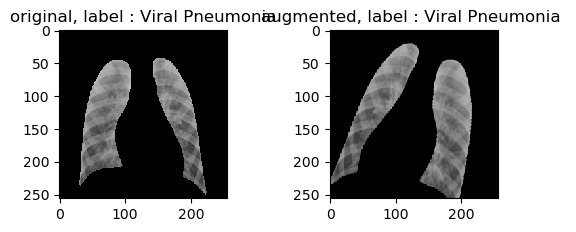

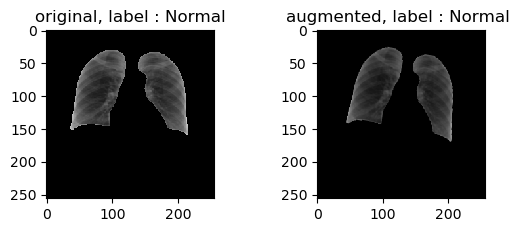

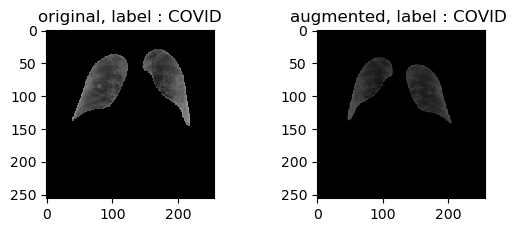

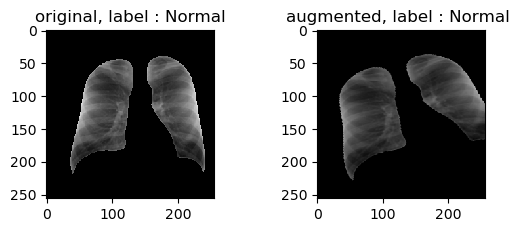

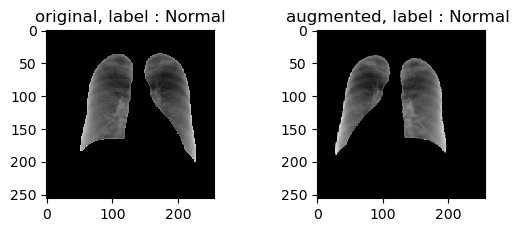

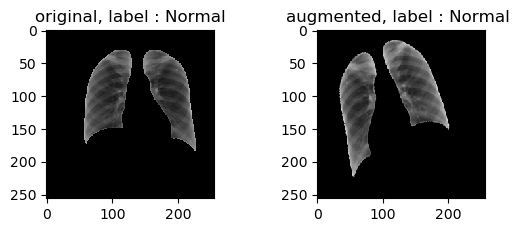

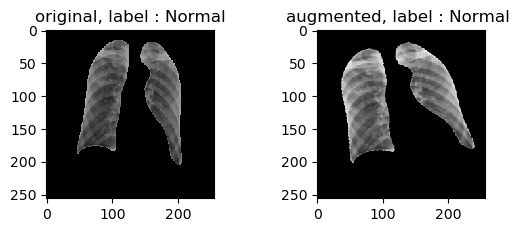

In [12]:
train_datagen_test = ImageDataGenerator(rescale=1./255,
    # width_shift_range = 0.1,
    # height_shift_range = 0.1,
    zoom_range = 0.2,
    rotation_range = 20,
    brightness_range = [0.6,1.4],
    horizontal_flip = True) 

or_datagen = ImageDataGenerator(rescale=1./255)

train_dataset_test = train_datagen_test.flow(X,
                                   labels,
                        batch_size = 16,
                        seed=123)


or_dataset = or_datagen.flow(X,
                                   labels,
                        batch_size = 16,
                        seed=123)


x_batch_augmented, y_batch_augmented = next(train_dataset_test)
x_batch_real, y_batch_real = next(or_dataset)


for i in range(16):
    image_augmented = x_batch_augmented[i]
    image_real = x_batch_real[i]

    plt.subplot(221)
    plt.imshow(image_real)
    plt.title(f"original, label : {y_batch_real[i]}")

        
    plt.subplot(222)
    plt.imshow(image_augmented)
    plt.title(f"augmented, label : {y_batch_augmented[i]} ")

    plt.show()